# Poker Hand Classification

## Dataset Collection

In [1]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
poker_hand = fetch_ucirepo(id=158) 
  
# data (as pandas dataframes) 
X = poker_hand.data.features 
y = poker_hand.data.targets 
  
# metadata 
print(poker_hand.metadata) 
  
# variable information 
print(poker_hand.variables) 


{'uci_id': 158, 'name': 'Poker Hand', 'repository_url': 'https://archive.ics.uci.edu/dataset/158/poker+hand', 'data_url': 'https://archive.ics.uci.edu/static/public/158/data.csv', 'abstract': 'Purpose is to predict poker hands', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1025010, 'num_features': 10, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['CLASS'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2002, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5KW38', 'creators': ['Robert Cattral', 'Franz Oppacher'], 'intro_paper': None, 'additional_info': {'summary': 'Each record is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the "Poker Hand". T

## Data Pre-Processing

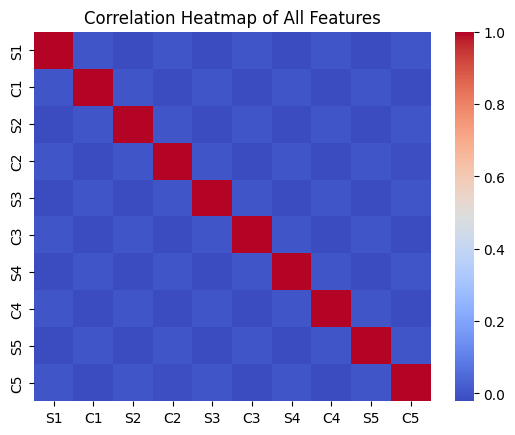

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = X.corr()
X.head()
sns.heatmap(corr_mat, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of All Features')
plt.show()

## Train using Logistic Regression, Decision Tree, Random Forest

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

results = []

models = [
    ("Logistic Regression", LogisticRegression(max_iter=10000, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Naive Bayes", GaussianNB())
]

for model_name, model in models:
    fit_start_datetime = datetime.now()
    print(f'Training "{model_name}"...')
    model.fit(X_train, y_train)
    fit_duration = (datetime.now() - fit_start_datetime).total_seconds()
    print(f'Finished in {fit_duration} seconds.')
    y_hat = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_hat)
    print(f'Accuracy: {accuracy}')
    print()
    results.append({
        "name": model_name,
        "accuracy": accuracy,
        "f1_score": f1_score(y_test, y_hat, average='weighted'),
        "precision": precision_score(y_test, y_hat, average='weighted'),
        "recall": recall_score(y_test, y_hat, average='weighted'),
        "fit_duration_seconds": fit_duration
    })

for result in results:
    print(f'# {result["name"]}')
    print(f'    Accuracy: {result["accuracy"]}')
    print(f'    F1 Score: {result["f1_score"]}')
    print(f'    Precision: {result["precision"]}')
    print(f'    Recall: {result["recall"]}')
    print(f'    Fit Duration: {result["fit_duration_seconds"]}s')
    print()

Training "Logistic Regression"...


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Finished in 241.235865 seconds.
Accuracy: 0.49988780597262467



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training "Decision Tree"...
Finished in 3.721587 seconds.
Accuracy: 0.6268329089472298



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training "Random Forest"...
Finished in 145.28049 seconds.
Accuracy: 0.7531568797702787



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training "Naive Bayes"...
Finished in 0.192573 seconds.
Accuracy: 0.49988780597262467

# Logistic Regression
    Accuracy: 0.49988780597262467
    F1 Score: 0.3332086807627334
    Precision: 0.24988781856012446
    Recall: 0.49988780597262467
    Fit Duration: 241.235865s

# Decision Tree
    Accuracy: 0.6268329089472298
    F1 Score: 0.6291035918561118
    Precision: 0.6316304484391368
    Recall: 0.6268329089472298
    Fit Duration: 3.721587s

# Random Forest
    Accuracy: 0.7531568797702787
    F1 Score: 0.7247097782541994
    Precision: 0.7445784558160632
    Recall: 0.7531568797702787
    Fit Duration: 145.28049s

# Naive Bayes
    Accuracy: 0.49988780597262467
    F1 Score: 0.3332086807627334
    Precision: 0.24988781856012446
    Recall: 0.49988780597262467
    Fit Duration: 0.192573s



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Train using SVM (specifically LinearSVC)
This is optional since it takes too long and is the worst performing model even with LinearSVC. (1447 seconds on my machine, roughly 25~ minutes)

In [5]:
# additionally try SVM
from sklearn.svm import LinearSVC
model = LinearSVC(random_state=42)
fit_start_datetime = datetime.now()
print(f'Training "LinearSVC"...')
model.fit(X_train, y_train)
fit_duration = (datetime.now() - fit_start_datetime).total_seconds()
print(f'Finished in {fit_duration} seconds.')
y_hat = model.predict(X_test)
accuracy = accuracy_score(y_test, y_hat)
print(f'Accuracy: {accuracy}')
print()
result = {
    "name": "LinearSVC",
    "accuracy": accuracy,
    "f1_score": f1_score(y_test, y_hat, average='weighted'),
    "precision": precision_score(y_test, y_hat, average='weighted'),
    "recall": recall_score(y_test, y_hat, average='weighted'),
    "fit_duration_seconds": fit_duration
} 
results.append(result)
print(f'# {result["name"]}')
print(f'    Accuracy: {result["accuracy"]}')
print(f'    F1 Score: {result["f1_score"]}')
print(f'    Precision: {result["precision"]}')
print(f'    Recall: {result["recall"]}')
print(f'    Fit Duration: {result["fit_duration_seconds"]}s')
print()


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training "LinearSVC"...


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Finished in 1391.446129 seconds.
Accuracy: 0.4217975109185927

# LinearSVC
    Accuracy: 0.4217975109185927
    F1 Score: 0.2637277313789387
    Precision: 0.3691983111562825
    Recall: 0.4217975109185927
    Fit Duration: 1391.446129s



## Model Selection
We select best model by ranking the models for each metric (Accuracy, Precision, Recall, and F1).
Using this ranking, we vote on which is best based on occurrence of being the best on each metric.

In [6]:
from collections import Counter

def most_common(lst):
    data = Counter(lst)
    return max(lst, key=data.get)

best_model_voting_pool = []

# get the best model in terms of accuracy
best_accuracy_model = max(results, key=lambda x: x["accuracy"])
best_model_voting_pool.append(best_accuracy_model["name"])
print(f'Best Model in terms of accuracy: {best_accuracy_model["name"]} @ {best_accuracy_model["accuracy"]} accuracy')

# get the best model in terms of precision
best_precision_model = max(results, key=lambda x: x["precision"])
best_model_voting_pool.append(best_precision_model["name"])
print(f'Best Model in terms of precision: {best_precision_model["name"]} @ {best_precision_model["precision"]} precision')

# get the best model in terms of recall
best_recall_model = max(results, key=lambda x: x["recall"])
best_model_voting_pool.append(best_recall_model["name"])
print(f'Best Model in terms of recall: {best_recall_model["name"]} @ {best_recall_model["recall"]} recall')

# get the best model in terms of f1 score
best_f1_score_model = max(results, key=lambda x: x["f1_score"])
best_model_voting_pool.append(best_f1_score_model["name"])
print(f'Best Model in terms of f1 score: {best_f1_score_model["name"]} @ {best_f1_score_model["f1_score"]} f1 score')

# get the best model by voting
best_model_name = most_common(best_model_voting_pool)
print(f'Best Model by voting: {best_model_name}')


Best Model in terms of accuracy: Random Forest @ 0.7531568797702787 accuracy
Best Model in terms of precision: Random Forest @ 0.7445784558160632 precision
Best Model in terms of recall: Random Forest @ 0.7531568797702787 recall
Best Model in terms of f1 score: Random Forest @ 0.7247097782541994 f1 score
Best Model by voting: Random Forest


## Ensembling

In [7]:
# ensemble methods
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, BaggingClassifier

best_model = None
for model in models:
    if model[0] == best_model_name:
        best_model = model[1]
        break

ensemble_methods = [
    ("Stacking Ensemble", StackingClassifier(estimators=[("best_model", best_model)], final_estimator=LogisticRegression(max_iter=10000, random_state=42))),
    ("AdaBoost Ensemble", AdaBoostClassifier(estimator=best_model, random_state=42)),
    ("Bagging Ensemble", BaggingClassifier(estimator=best_model, random_state=42))
]

ensemble_results = []

for ensemble_method, ensemble_model in ensemble_methods:
    fit_start_datetime = datetime.now()
    print(f'Training "{ensemble_method}"...')
    ensemble_model.fit(X_train, y_train)
    fit_duration = (datetime.now() - fit_start_datetime).total_seconds()
    print(f'Finished in {fit_duration} seconds.')
    y_hat = ensemble_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_hat)
    print(f'Accuracy: {accuracy}')
    print()
    ensemble_results.append({
        "name": ensemble_method,
        "accuracy": accuracy,
        "f1_score": f1_score(y_test, y_hat, average='weighted'),
        "precision": precision_score(y_test, y_hat, average='weighted'),
        "recall": recall_score(y_test, y_hat, average='weighted'),
        "fit_duration_seconds": fit_duration
    })

for result in ensemble_results:
    print(f'{result["name"]}: {result["accuracy"]} ({result["fit_duration_seconds"]}s)')

Training "Stacking Ensemble"...


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Finished in 752.422841 seconds.
Accuracy: 0.7950946820031024



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training "AdaBoost Ensemble"...
Finished in 171.817043 seconds.
Accuracy: 0.7528674516996582



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training "Bagging Ensemble"...
Finished in 941.94587 seconds.
Accuracy: 0.7473130343443803

Stacking Ensemble: 0.7950946820031024 (752.422841s)
AdaBoost Ensemble: 0.7528674516996582 (171.817043s)
Bagging Ensemble: 0.7473130343443803 (941.94587s)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Visualization

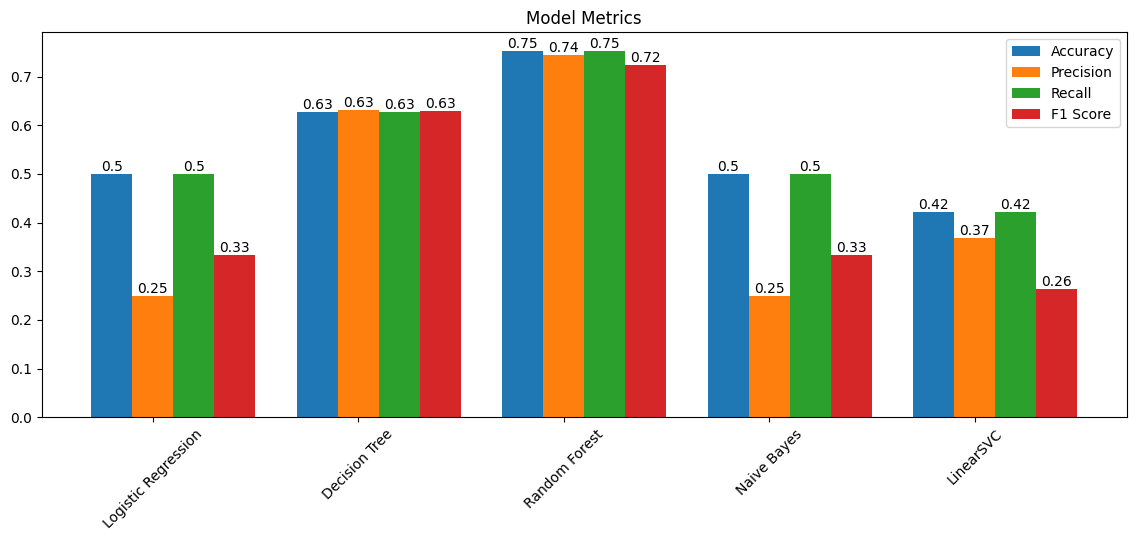

In [25]:
# graph results via bar chart for accuracy, precision, recall, and f1 score
import matplotlib.pyplot as plt

labels = [result["name"] for result in results]
accuracy = [result["accuracy"] for result in results]
precision = [result["precision"] for result in results]
recall = [result["recall"] for result in results]
f1_score = [result["f1_score"] for result in results]

x = range(len(labels))

fig, ax = plt.subplots(figsize=(14, 5))
bar_width = 0.2
b1 = ax.bar(x, accuracy, width=bar_width, label='Accuracy')
b2 = ax.bar([i + bar_width for i in x], precision, width=bar_width, label='Precision')
b3 = ax.bar([i + bar_width * 2 for i in x], recall, width=bar_width, label='Recall')
b4 = ax.bar([i + bar_width * 3 for i in x], f1_score, width=bar_width, label='F1 Score')

for i in range(len(x)):
    ax.text(i, accuracy[i], round(accuracy[i], 2), ha='center', va='bottom')
    ax.text(i + bar_width, precision[i], round(precision[i], 2), ha='center', va='bottom')
    ax.text(i + bar_width * 2, recall[i], round(recall[i], 2), ha='center', va='bottom')
    ax.text(i + bar_width * 3, f1_score[i], round(f1_score[i], 2), ha='center', va='bottom')

ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.title('Model Metrics')
plt.show()

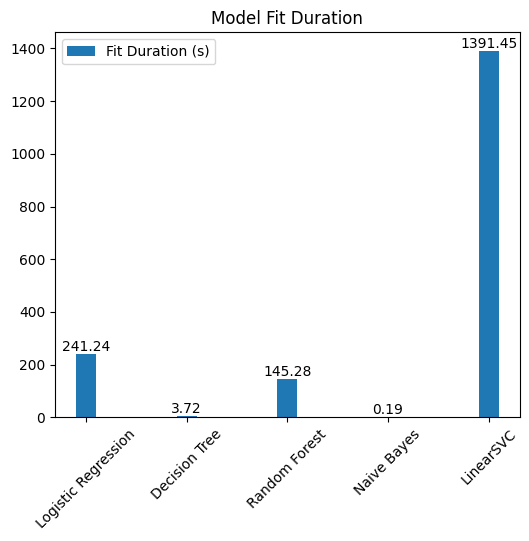

In [30]:
# graph results via bar chart for fit duration
labels = [result["name"] for result in results]
fit_duration_seconds = [result["fit_duration_seconds"] for result in results]

x = range(len(labels))

fig, ax = plt.subplots(figsize=(6, 5))
bar_width = 0.2
b1 = ax.bar(x, fit_duration_seconds, width=bar_width, label='Fit Duration (s)')
for i in range(len(x)):
    ax.text(i, fit_duration_seconds[i], round(fit_duration_seconds[i], 2), ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.title('Model Fit Duration')
plt.show()

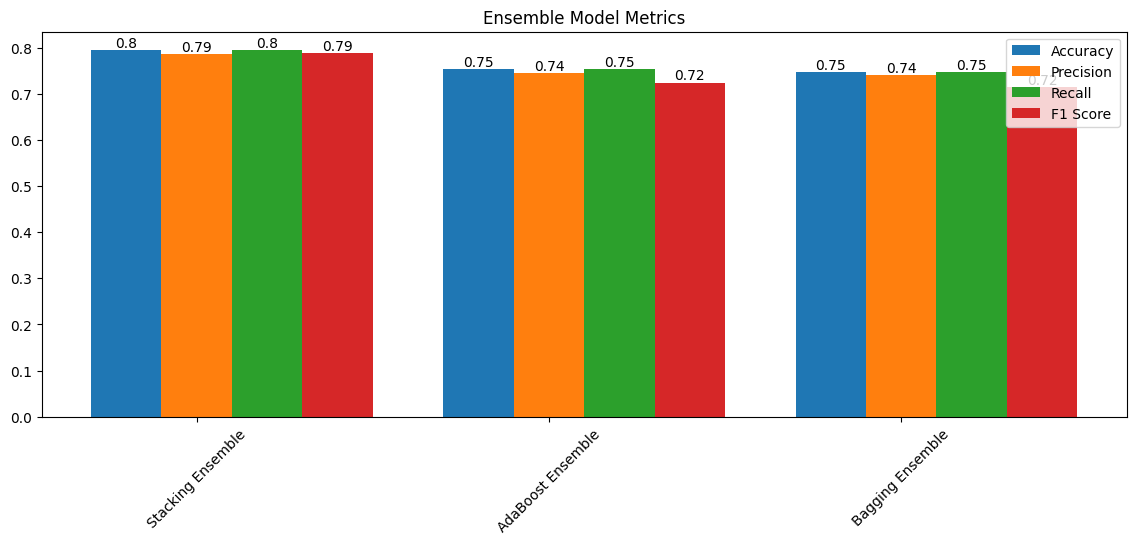

In [26]:
# graph ensemble results via bar chart for accuracy, precision, recall, and f1 score

ensemble_labels = [result["name"] for result in ensemble_results]
ensemble_accuracy = [result["accuracy"] for result in ensemble_results]
ensemble_precision = [result["precision"] for result in ensemble_results]
ensemble_recall = [result["recall"] for result in ensemble_results]
ensemble_f1_score = [result["f1_score"] for result in ensemble_results]

x = range(len(ensemble_labels))

fig, ax = plt.subplots(figsize=(14, 5))
bar_width = 0.2
b1 = ax.bar(x, ensemble_accuracy, width=bar_width, label='Accuracy')
b2 = ax.bar([i + bar_width for i in x], ensemble_precision, width=bar_width, label='Precision')
b3 = ax.bar([i + bar_width * 2 for i in x], ensemble_recall, width=bar_width, label='Recall')
b4 = ax.bar([i + bar_width * 3 for i in x], ensemble_f1_score, width=bar_width, label='F1 Score')

for i in range(len(x)):
    ax.text(i, ensemble_accuracy[i], round(ensemble_accuracy[i], 2), ha='center', va='bottom')
    ax.text(i + bar_width, ensemble_precision[i], round(ensemble_precision[i], 2), ha='center', va='bottom')
    ax.text(i + bar_width * 2, ensemble_recall[i], round(ensemble_recall[i], 2), ha='center', va='bottom')
    ax.text(i + bar_width * 3, ensemble_f1_score[i], round(ensemble_f1_score[i], 2), ha='center', va='bottom')

ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(ensemble_labels, rotation=45)
ax.legend()
plt.title('Ensemble Model Metrics')
plt.show()

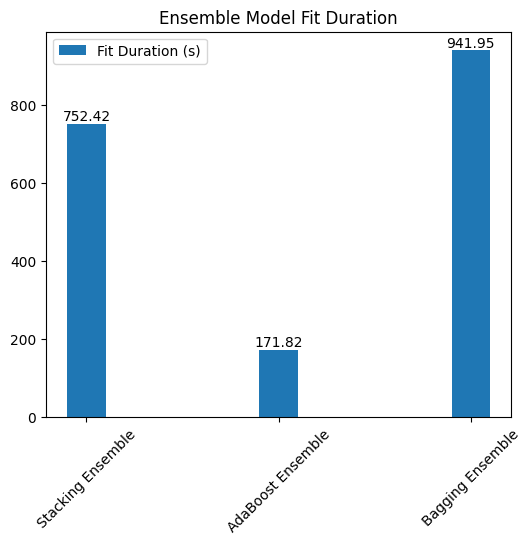

In [31]:
# graph ensemble results via bar chart for fit duration
ensemble_labels = [result["name"] for result in ensemble_results]
ensemble_fit_duration_seconds = [result["fit_duration_seconds"] for result in ensemble_results]

x = range(len(ensemble_labels))

fig, ax = plt.subplots(figsize=(6, 5))
bar_width = 0.2
b1 = ax.bar(x, ensemble_fit_duration_seconds, width=bar_width, label='Fit Duration (s)')
for i in range(len(x)):
    ax.text(i, ensemble_fit_duration_seconds[i], round(ensemble_fit_duration_seconds[i], 2), ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(ensemble_labels, rotation=45)
ax.legend()
plt.title('Ensemble Model Fit Duration')
plt.show()

## Summary

In [27]:
import pandas as pd

results_df = pd.DataFrame(results)
ensemble_results_df = pd.DataFrame(ensemble_results)

print('Results:')
print(results_df)
print()
print('Ensemble Results:')
print(ensemble_results_df)
print()

Results:
                  name  accuracy  f1_score  precision    recall  \
0  Logistic Regression  0.499888  0.333209   0.249888  0.499888   
1        Decision Tree  0.626833  0.629104   0.631630  0.626833   
2        Random Forest  0.753157  0.724710   0.744578  0.753157   
3          Naive Bayes  0.499888  0.333209   0.249888  0.499888   
4            LinearSVC  0.421798  0.263728   0.369198  0.421798   

   fit_duration_seconds  
0            241.235865  
1              3.721587  
2            145.280490  
3              0.192573  
4           1391.446129  

Ensemble Results:
                name  accuracy  f1_score  precision    recall  \
0  Stacking Ensemble  0.795095  0.787778   0.786654  0.795095   
1  AdaBoost Ensemble  0.752867  0.724432   0.744208  0.752867   
2   Bagging Ensemble  0.747313  0.715193   0.740419  0.747313   

   fit_duration_seconds  
0            752.422841  
1            171.817043  
2            941.945870  



In [32]:
from sklearn.metrics import classification_report

print('Model Classification Reports:')
for model in models:
    model_name = model[0]
    y_hat = model[1].predict(X_test)
    print(f'{model_name} Classification Report:')
    print(classification_report(y_test, y_hat))
    print()

print('Ensemble Model Classification Reports:')
for ensemble_method, ensemble_model in ensemble_methods:
    y_hat = ensemble_model.predict(X_test)
    print(f'{ensemble_method} Classification Report:')
    print(classification_report(y_test, y_hat))
    print()

Model Classification Reports:
Logistic Regression Classification Report:


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    153717
           1       0.00      0.00      0.00    130369
           2       0.00      0.00      0.00     14545
           3       0.00      0.00      0.00      6524
           4       0.00      0.00      0.00      1203
           5       0.00      0.00      0.00       611
           6       0.00      0.00      0.00       446
           7       0.00      0.00      0.00        81
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3

    accuracy                           0.50    307503
   macro avg       0.05      0.10      0.07    307503
weighted avg       0.25      0.50      0.33    307503


Decision Tree Classification Report:


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.72      0.70      0.71    153717
           1       0.59      0.59      0.59    130369
           2       0.26      0.30      0.28     14545
           3       0.33      0.36      0.34      6524
           4       0.24      0.27      0.25      1203
           5       0.12      0.18      0.14       611
           6       0.14      0.17      0.15       446
           7       0.17      0.21      0.19        81
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3

    accuracy                           0.63    307503
   macro avg       0.26      0.28      0.27    307503
weighted avg       0.63      0.63      0.63    307503


Random Forest Classification Report:


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.78      0.91      0.84    153717
           1       0.72      0.70      0.71    130369
           2       0.61      0.03      0.06     14545
           3       0.81      0.06      0.12      6524
           4       0.58      0.01      0.02      1203
           5       0.98      0.10      0.19       611
           6       0.40      0.00      0.01       446
           7       0.00      0.00      0.00        81
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3

    accuracy                           0.75    307503
   macro avg       0.49      0.18      0.19    307503
weighted avg       0.74      0.75      0.72    307503


Naive Bayes Classification Report:


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    153717
           1       0.00      0.00      0.00    130369
           2       0.00      0.00      0.00     14545
           3       0.00      0.00      0.00      6524
           4       0.00      0.00      0.00      1203
           5       0.00      0.00      0.00       611
           6       0.00      0.00      0.00       446
           7       0.00      0.00      0.00        81
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3

    accuracy                           0.50    307503
   macro avg       0.05      0.10      0.07    307503
weighted avg       0.25      0.50      0.33    307503


Ensemble Model Classification Reports:
Stacking Ensemble Classification Report:


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.84      0.88      0.86    153717
           1       0.76      0.78      0.77    130369
           2       0.58      0.30      0.39     14545
           3       0.69      0.49      0.57      6524
           4       0.22      0.07      0.10      1203
           5       0.92      0.66      0.77       611
           6       0.19      0.02      0.04       446
           7       0.00      0.00      0.00        81
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3

    accuracy                           0.80    307503
   macro avg       0.42      0.32      0.35    307503
weighted avg       0.79      0.80      0.79    307503


AdaBoost Ensemble Classification Report:


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.78      0.91      0.84    153717
           1       0.72      0.69      0.71    130369
           2       0.61      0.03      0.06     14545
           3       0.81      0.06      0.12      6524
           4       0.58      0.01      0.02      1203
           5       0.96      0.11      0.20       611
           6       0.50      0.00      0.00       446
           7       0.00      0.00      0.00        81
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3

    accuracy                           0.75    307503
   macro avg       0.50      0.18      0.20    307503
weighted avg       0.74      0.75      0.72    307503


